In [10]:
import pandas as pd
data_crime = pd.read_csv('F:\Crime rate prediction\Working in colab\crime.csv')
data_crime

,STATE,YEAR,MURDER,RAPE,ARSON,THEFT,KIDNAPPING & ABDUCTION
0,andhra pradesh,2001,2602,871,872,16751,1182
1,arunachal pradesh,2001,83,33,13,443,83
2,assam,2001,1356,817,441,5367,1480
3,bihar,2001,3643,888,502,9701,2159
4,chhattisgarh,2001,880,959,215,4812,207
...,...,...,...,...,...,...,...
403,chandigarh,2012,21,27,9,1549,87
404,d & n haveli,2012,7,3,12,68,13
405,daman & diu,2012,3,5,11,55,3
406,lakshadweep,2012,1,1,3,7,1


In [11]:
import pandas as pd
data_number = pd.read_csv('F:\Crime rate prediction\Working in colab\crime_short_number.csv')
data_number

,STATE,YEAR,MURDER,RAPE,ARSON,THEFT,KIDNAPPING & ABDUCTION
0,1,2001,2602,871,872,16751,1182
1,2,2001,83,33,13,443,83
2,3,2001,1356,817,441,5367,1480
3,4,2001,3643,888,502,9701,2159
4,5,2001,880,959,215,4812,207
...,...,...,...,...,...,...,...
403,30,2012,21,27,9,1549,87
404,31,2012,7,3,12,68,13
405,32,2012,3,5,11,55,3
406,34,2012,0,0,3,7,0


In [15]:
data_murder = data_crime[data_crime['STATE']=='karnataka']
data_murder

,STATE,YEAR,MURDER,RAPE,ARSON,THEFT,KIDNAPPING & ABDUCTION
11,karnataka,2001,1626,293,352,12868,559
45,karnataka,2002,1627,292,437,13818,645
79,karnataka,2003,1506,321,415,14180,531
113,karnataka,2004,1519,291,248,16093,592
147,karnataka,2005,1609,343,238,17008,589
181,karnataka,2006,1627,400,268,14901,563
215,karnataka,2007,1538,436,262,14351,680
249,karnataka,2008,1698,446,265,17820,758
283,karnataka,2009,1702,509,293,20576,892
317,karnataka,2010,1805,586,286,20093,1374


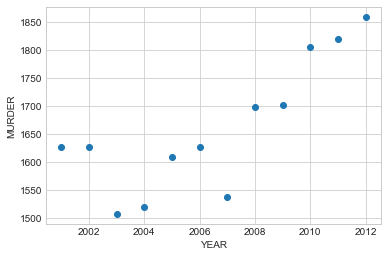

In [16]:

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np


plt.scatter(x =data_murder.YEAR , y =data_murder.MURDER , marker='o');
plt.xlabel('YEAR')
plt.ylabel('MURDER')
plt.show()


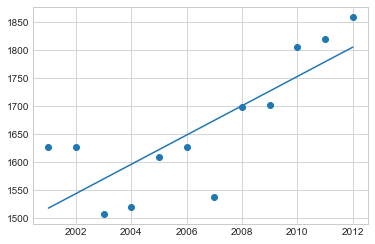

In [17]:
import matplotlib.pyplot as plt
from scipy import stats

x =data_murder.YEAR
y =data_murder.MURDER
slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [18]:
import pandas
from sklearn import linear_model

X = data_murder[['YEAR']]
y = data_murder['MURDER']

regr = linear_model.LinearRegression()
regr.fit(X, y)


data_2001 = regr.predict([[2001]])

print(data_2001)

[1517.24358974]


In [19]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
y_pred = regr.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(3)
print(df1)

     Actual    Predicted
215    1538  1674.523310
385    1860  1805.589744
147    1609  1622.096737


In [28]:
from sklearn.metrics import mean_squared_error
import math
math.sqrt(mean_squared_error(y_test, y_pred, squared=True))


85.18727348580275

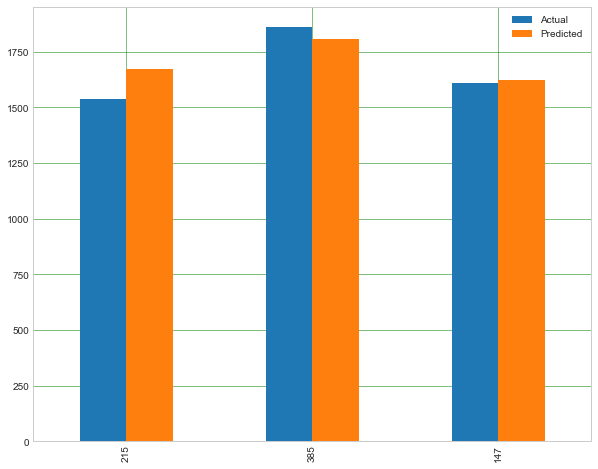

In [26]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


In [23]:
for m in ['andhra pradesh', 'arunachal pradesh', 'assam', 'bihar', 'chhattisgarh', 'goa', 'gujarat', 'haryana','himachal pradesh','jammu & kashmir','jharkhand','karnataka', 'kerala', 'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya',
'mizoram', 'nagaland', 'odisha', 'punjab', 'rajasthan', 'sikkim', 'tamil nadu',
'tripura', 'uttar pradesh', 'uttarakhand', 'west bengal', 'a & n islands',
'chandigarh', 'd & n haveli', 'daman & diu','puducherry']:
    for n in range(1):
        data_murder =  data_crime[data_crime['STATE']==m]
        print(data_murder)

              STATE  YEAR  MURDER  RAPE  ARSON  THEFT  KIDNAPPING & ABDUCTION
0    andhra pradesh  2001    2602   871    872  16751                    1182
34   andhra pradesh  2002    2525  1002    991  19222                    1302
68   andhra pradesh  2003    2667   946   1049  23408                    1485
102  andhra pradesh  2004    2579  1016    915  23578                    1526
136  andhra pradesh  2005    2750   935    967  23778                    1612
170  andhra pradesh  2006    2766  1049   1012  23510                    2030
204  andhra pradesh  2007    2665  1070   1176  24391                    2097
238  andhra pradesh  2008    2690  1257   1021  25362                    1970
272  andhra pradesh  2009    2449  1188   1039  24692                    1958
306  andhra pradesh  2010    2538  1362    925  26756                    2053
340  andhra pradesh  2011    2808  1442   1021  28267                    2154
374  andhra pradesh  2012    2717  1341    980  27475           

In [ ]:
import pandas
from sklearn import linear_model
for m in ['andhra pradesh', 'arunachal pradesh', 'assam', 'bihar', 'chhattisgarh', 'goa', 'gujarat', 'haryana','himachal pradesh','jammu & kashmir','jharkhand','karnataka', 'kerala', 'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya',
'mizoram', 'nagaland', 'odisha', 'punjab', 'rajasthan', 'sikkim', 'tamil nadu',
'tripura', 'uttar pradesh', 'uttarakhand', 'west bengal', 'a & n islands',
'chandigarh', 'd & n haveli', 'daman & diu','lakshadweep','puducherry']:
    for n in range(1):
        data_murder =  data_crime[data_crime['STATE']==m]
        for p in ['MURDER','RAPE','ARSON','THEFT']:
            for q in range(1):
                r = data_murder.loc[:,p]
                s = data_murder[['YEAR']]
                t = r
                regr = linear_model.LinearRegression()
                regr.fit(s,t)
                data_pred = regr.predict([[2022]])
                data_list = data_pred.tolist()
                data_list_round = []
                for num in data_list:
                    data_list_round.append(round(num))
                    print(data_list_round)
data_2022 = pd.DataFrame(data_list_round) 
print(data_2022)
